# Découverte des données

In [5]:
#impoter les packages 
import os #pour manipuler les fichiers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#collecter les noms des fichiers ou dataset
files=[file for file in os.listdir(r'C:/DataProjets/Analyse_De_Vente_d_une_Societe_de_Smartphone/Data')]
for file in files :
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [7]:
path=r'C:/DataProjets/Analyse_De_Vente_d_une_Societe_de_Smartphone/Data'

#créer une base de données vide 
all_data=pd.DataFrame()

for file in files:
    current_data=pd.read_csv(path+'/'+file)
    all_data=pd.concat([all_data,current_data])
print(all_data)

      Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
11681   259353      AAA Batteries (4-pack)                3       2.99   
11682   259354                      iPhone                1        700   
11683   259355                      iPhone                1        700   
11684   259356      34in Ultrawide Monitor                1     379.99   
11685   259357        USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  
0      04/19/19 08:46             917 1st St, 

In [8]:
# Création de notre base de donnée en format csv
all_data.to_csv(path+'/all_data.csv', index=False)

In [9]:
#Exploration de notre base de données all_data
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [10]:
#Exploration des premiers éléments de notre base de données
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [11]:
#Nous remarquons que la colonne "Quantity Ordered" et "Price Each" sont des valeurs numériques et non des objets ou chaines de caractères comme il a été mentionné dans la cellule d'avant. Nous devons donc transformer ces données.

In [12]:
# Nombre des valeurs manquantes
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [13]:
# Avec un total de 186 850 valeurs contre 545 valeurs manquantes, nous pouvons procéder à la suppression de ces valeurs manquantes. Pas d'influence majeure sur notre résultat.

In [14]:
#supprimer les valeurs manquantes
all_data=all_data.dropna(how='all')
all_data.shape #taille de notre dataframe

(186305, 6)

In [15]:
#On se  retrouve avec 186 305 valeurs.

# Quel est le mois durant lequel nous avons réalisé le meilleur chiffre d'affaire?

In [16]:
#définir une fonction qui nous permet d'extraire le mois
def month(x) :
    return x.split('/')[0]

In [17]:
#appliquer la fonction 'month' sur la colonne 'Order Date' 
all_data['Month']=all_data['Order Date'].apply(month)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [18]:
#vérifier les valeurs de la colonne Month
all_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [19]:
#on remarque qu'il y a une avleur 'Order Date', nous devons donc la supprimer

In [20]:
#appliquer un filtre pour supprimer 'Order Date'
all_data=all_data[all_data['Month']!='Order Date']
all_data['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [21]:
all_data.dtypes 

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [22]:
#transformons 'Month' en type int
all_data['Month'].astype(int)
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [27]:
#tansformer le prix en type 'float' pour caluler le CA
all_data ['Price Each']=all_data['Price Each'].astype(float)

#transformer quantité en type int
all_data ['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)

all_data.dtypes

C:\Users\Rotial Marbin\AppData\Local\Temp\ipykernel_19636\2384612316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data ['Price Each']=all_data['Price Each'].astype(float)
C:\Users\Rotial Marbin\AppData\Local\Temp\ipykernel_19636\2384612316.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data ['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)


Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
dtype: object

In [28]:
#calulons le chiffre d'affaire 
all_data['Sales']=all_data ['Quantity Ordered']*all_data ['Price Each']
all_data

C:\Users\Rotial Marbin\AppData\Local\Temp\ipykernel_19636\1616570525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales']=all_data ['Quantity Ordered']*all_data ['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99


In [29]:
#trouver le chiffre d'affaire de chaque mois, on va utiliser 'groupby'
all_data.groupby('Month')['Sales'].sum()

Month
01    1822256.73
02    2202022.42
03    2807100.38
04    3390670.24
05    3152606.75
06    2577802.26
07    2647775.76
08    2244467.88
09    2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

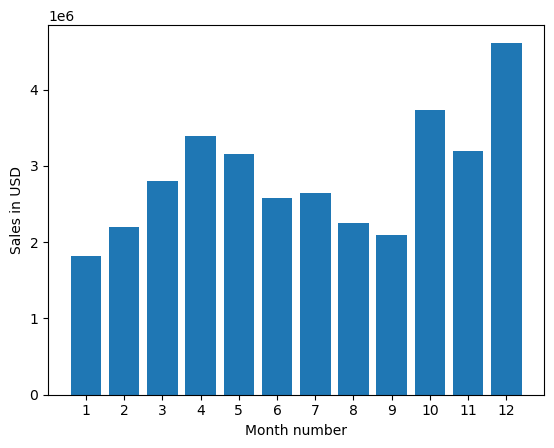

In [30]:
months=range(1,13)
sales_by_month= all_data.groupby('Month')['Sales'].sum()
plt.bar(months,sales_by_month)

#définir les étiquettes de l'axe x pour chaque mois
plt.xticks(months) 
plt.ylabel('Sales in USD')
plt.xlabel('Month number')

#affiche le graphique à barres
plt.show()


# Dans quelle ville nous avons enregistré un maximum de commandes ?

In [31]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99


In [32]:
#On doit extraire la ville dans la colonne 'Purchase Address'
def city(x) :
    return x.split(',')[1]

In [33]:
all_data['City']=all_data['Purchase Address'].apply(city)
all_data

C:\Users\Rotial Marbin\AppData\Local\Temp\ipykernel_19636\640088211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['City']=all_data['Purchase Address'].apply(city)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97,Los Angeles
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,San Francisco
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99,San Francisco


In [34]:
all_data.groupby('City')['City'].count()

City
Atlanta          14881
Austin            9905
Boston           19934
Dallas           14820
Los Angeles      29605
New York City    24876
Portland         12465
San Francisco    44732
Seattle          14732
Name: City, dtype: int64

In [35]:
all_data.groupby('City')['City'].count().index

Index([' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles',
       ' New York City', ' Portland', ' San Francisco', ' Seattle'],
      dtype='object', name='City')

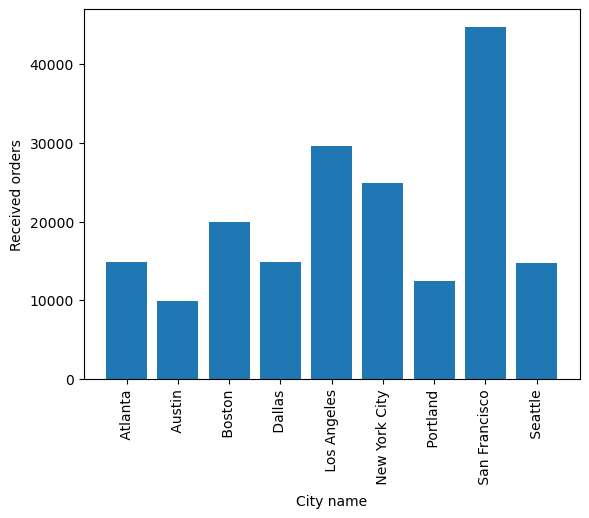

In [36]:
plt.bar(all_data.groupby('City')['City'].count().index,all_data.groupby('City')['City'].count())
plt.xticks(rotation='vertical')
plt.ylabel('Received orders')
plt.xlabel('City name')
plt.show()

# En quel moment doit on  faire une compagne publicitaire pour avoir plus de ventes ?

In [37]:
#pour se faire on doit extraire l'heure dans la colonne 'Order Date'
all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour

C:\Users\Rotial Marbin\AppData\Local\Temp\ipykernel_19636\1693301508.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour
C:\Users\Rotial Marbin\AppData\Local\Temp\ipykernel_19636\1693301508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour


In [38]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97,Los Angeles,20
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,San Francisco,16
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00,San Francisco,7
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99,San Francisco,17


In [39]:
#créer deux variables pour voir l'évolution des commandes
keys=[]
hours=[]
for key,hour in all_data.groupby('Hour') :
    keys.append(key)
    hours.append(len(hour))
hours

[3910,
 2350,
 1243,
 831,
 854,
 1321,
 2482,
 4011,
 6256,
 8748,
 10944,
 12411,
 12587,
 12129,
 10984,
 10175,
 10384,
 10899,
 12280,
 12905,
 12228,
 10921,
 8822,
 6275]

Text(0, 0.5, 'Nombre des commandes')

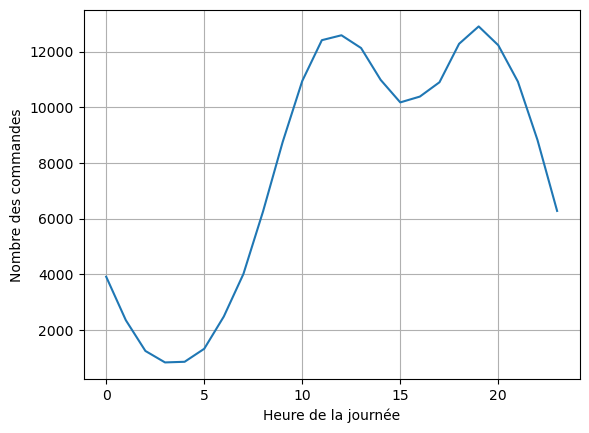

In [43]:
plt.grid()
plt.plot(keys,hours)
plt.xlabel('Heure de la journée')
plt.ylabel('Nombre des commandes')

In [42]:
#Le meilleur moment de la journée où on doit lancer la compagne publicitaire c'est entre 12h et 19h.

# Quel produit se vend le plus?

<Axes: xlabel='Product'>

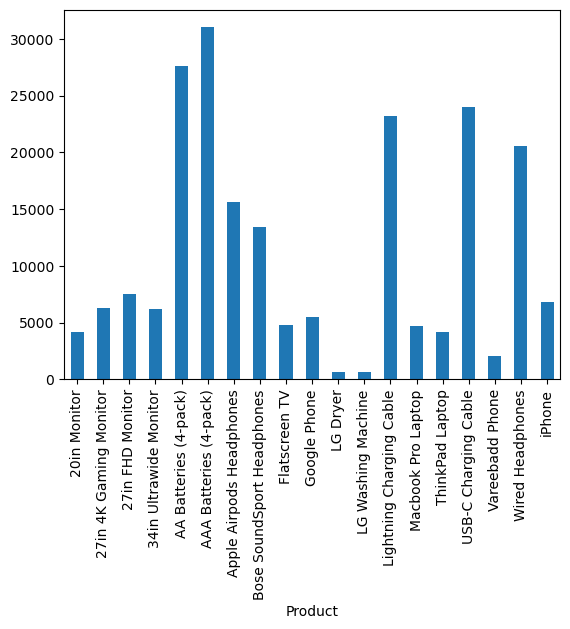

In [45]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

<Axes: xlabel='Product'>

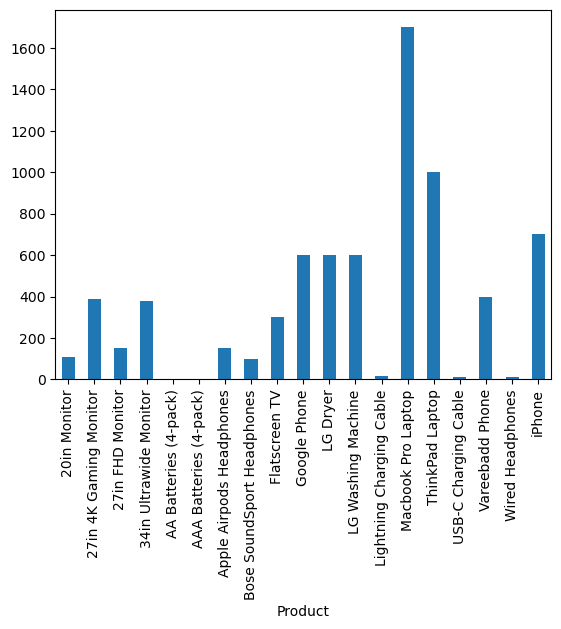

In [47]:
all_data.groupby('Product')['Price Each'].mean().plot(kind='bar')

In [48]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

C:\Users\Rotial Marbin\AppData\Local\Temp\ipykernel_19636\3672480498.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axe1.set_xticklabels(products, rotation='vertical',size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 4000x2400 with 0 Axes>

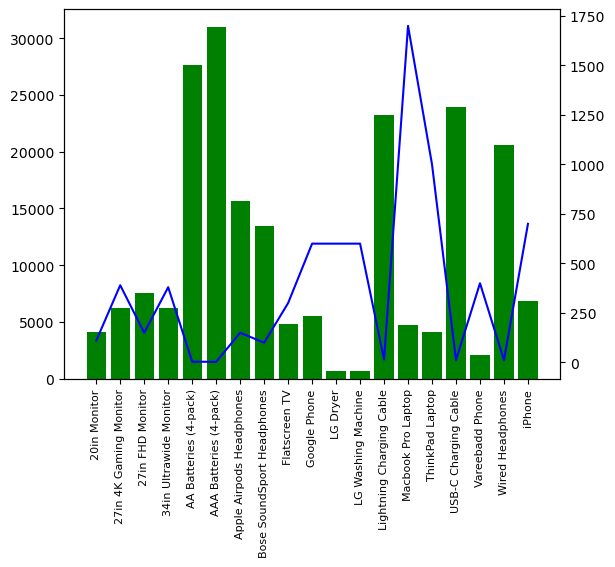

In [53]:
#l'impacte du prix sur les quantités des produits vendus

# Crée une nouvelle figure avec une taille de 40 pouces de large et 24 pouces de haut
plt.figure(figsize=(40,24))

# Crée un nouveau subplot avec une figure et un axe, et les assigne à fig et axe1
fig,axe1=plt.subplots()

# Crée un deuxième axe (axe2) qui partage le même axe x que axe1
axe2=axe1.twinx()
axe1.bar(products,quantity,color='g')
axe2.plot(products, prices,'b-')
axe1.set_xticklabels(products, rotation='vertical',size=8)

# Quelles sont les combinaisons de produits qui se vendent plus?

In [59]:
#les commandes avec le même 'Order ID' font parties de la même commande.
#classer les 'Order ID' sont supprimer les doublons
all_data[all_data['Order ID'].duplicated(keep=False)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,14
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles,19
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",04,99.99,Boston,11
...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",09,3.84,Atlanta,20
11639,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",09,11.99,Atlanta,0
11640,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",09,5.98,Atlanta,0
11677,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",09,600.00,San Francisco,13


In [60]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]

In [63]:
#Grouper les produits qui ont le même ID, séparer les produits par une virgule
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\Rotial Marbin\AppData\Local\Temp\ipykernel_19636\1904288561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [62]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",04,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",09,3.84,Atlanta,20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",09,11.99,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
11640,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",09,5.98,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
11677,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",09,600.00,San Francisco,13,"Google Phone,USB-C Charging Cable"


In [64]:
#voir toutes les combinaisons 
df['Grouped']

3                            Google Phone,Wired Headphones
4                            Google Phone,Wired Headphones
18                       Google Phone,USB-C Charging Cable
19                       Google Phone,USB-C Charging Cable
30       Bose SoundSport Headphones,Bose SoundSport Hea...
                               ...                        
11628         34in Ultrawide Monitor,AA Batteries (4-pack)
11639              Wired Headphones,AAA Batteries (4-pack)
11640              Wired Headphones,AAA Batteries (4-pack)
11677                    Google Phone,USB-C Charging Cable
11678                    Google Phone,USB-C Charging Cable
Name: Grouped, Length: 14649, dtype: object

In [65]:
#supprimer les élements dupliqués pour afficher qu'un 'Order ID' pour chaque commande
df2=df.drop_duplicates(subset=['Order ID'])
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",04,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",04,5.98,San Francisco,17,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",04,14.95,New York City,11,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...,...,...,...,...,...,...,...,...,...
11617,259296,Apple Airpods Headphones,1,150.00,09/28/19 16:48,"894 6th St, Dallas, TX 75001",09,150.00,Dallas,16,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,iPhone,1,700.00,09/15/19 18:54,"138 Main St, Boston, MA 02215",09,700.00,Boston,18,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,34in Ultrawide Monitor,1,379.99,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",09,379.99,Atlanta,20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",09,11.99,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"


In [67]:
# 5 premières combinaisons les plus achetées
df['Grouped'].value_counts()[0:5]

Grouped
iPhone,Lightning Charging Cable         1764
Google Phone,USB-C Charging Cable       1712
iPhone,Wired Headphones                  722
Vareebadd Phone,USB-C Charging Cable     624
Google Phone,Wired Headphones            606
Name: count, dtype: int64

<Axes: ylabel='count'>

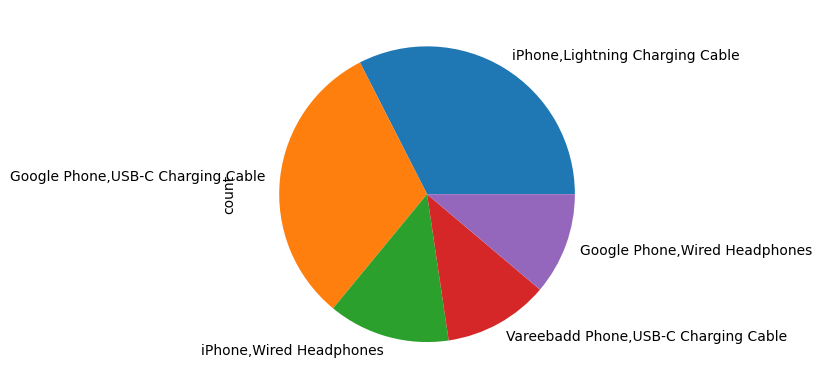

In [68]:
#visualisation 
df['Grouped'].value_counts()[0:5].plot.pie()